# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

## 0) Setup

Import pandas **with the correct name** and set `matplotlib` to always display graphics in the notebook.

In [1]:
import pandas as pd
%matplotlib inline

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`, *but you'll also need to install a new library*. You might need to restart your kernel afterward!

In [7]:
df = pd.read_excel("/Users/palar/Documents/columbia/data_foundations/05-homework/richpeople.xlsx")

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 30 columns):
year                       1653 non-null int64
name                       1653 non-null object
rank                       1653 non-null int64
citizenship                1653 non-null object
countrycode                1653 non-null object
networthusbillion          1653 non-null float64
selfmade                   1651 non-null object
typeofwealth               1651 non-null object
gender                     1653 non-null object
age                        1590 non-null float64
industry                   1652 non-null object
IndustryAggregates         1652 non-null object
region                     1653 non-null object
north                      1653 non-null int64
politicalconnection        56 non-null float64
founder                    1653 non-null int64
generationofinheritance    1653 non-null object
sector                     1653 non-null object
company                    1645 

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [9]:
df.sort_values(by="networthusbillion", ascending=False).head(10)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
184,2014,Bill Gates,1,United States,USA,76.0,self-made,founder non-finance,male,58.0,...,founder,1975.0,NaN,Microsoft,NaN,NaN,http://www.forbes.com/profile/bill-gates/,NaN,NaN,NaN
226,2014,Carlos Slim Helu,2,Mexico,MEX,72.0,self-made,privatized and resources,male,74.0,...,founder,1990.0,NaN,telecom,NaN,NaN,http://www.ozy.com/provocateurs/carlos-slims-w...,NaN,NaN,NaN
79,2014,Amancio Ortega,3,Spain,ESP,64.0,self-made,founder non-finance,male,77.0,...,founder,1975.0,NaN,retail,NaN,NaN,http://www.forbes.com/profile/amancio-ortega/,NaN,NaN,NaN
1562,2014,Warren Buffett,4,United States,USA,58.2,self-made,founder non-finance,male,83.0,...,founder,1839.0,NaN,Berkshire Hathaway,NaN,NaN,http://www.forbes.com/lists/2009/10/billionair...,http://www.forbes.com/companies/berkshire-hath...,NaN,NaN
862,2014,Larry Ellison,5,United States,USA,48.0,self-made,founder non-finance,male,69.0,...,founder,1977.0,NaN,Oracle,NaN,NaN,http://www.forbes.com/profile/larry-ellison/,http://www.businessinsider.com/how-larry-ellis...,NaN,NaN
339,2014,David Koch,6,United States,USA,40.0,inherited,inherited,male,73.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
247,2014,Charles Koch,6,United States,USA,40.0,inherited,inherited,male,78.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
1364,2014,Sheldon Adelson,8,United States,USA,38.0,self-made,self-made finance,male,80.0,...,founder,1952.0,NaN,casinos,NaN,NaN,http://www.forbes.com/profile/sheldon-adelson/,http://lasvegassun.com/news/1996/nov/26/rat-pa...,NaN,NaN
280,2014,Christy Walton,9,United States,USA,36.7,inherited,inherited,female,59.0,...,relation,1962.0,NaN,Wal-Mart,widow,NaN,http://www.forbes.com/profile/christy-walton/,NaN,NaN,NaN
724,2014,Jim Walton,10,United States,USA,34.7,inherited,inherited,male,66.0,...,relation,1962.0,NaN,Wal-Mart,inherited from father,NaN,http://www.forbes.com/profile/jim-walton/,NaN,NaN,NaN


## 4) How many male billionaires are there compared to the number of female billionares? What percent is that? Do they have a different average wealth?

> **TIP:** The last part uses `groupby`, but the count/percent part does not.
> **TIP:** When I say "average," you can pick what kind of average you use.

In [15]:
genders = df.gender.value_counts()
genders.head()

male      1473
female     180
Name: gender, dtype: int64

In [24]:
#There are over 8 male billionares for every 1 female billionare:
round(genders['male']/genders['female'], 1)


8.2

In [26]:
#That means there are 818 percent male billionares compared to female billionares.
round(genders['male']/genders['female']*100)



818.0

In [38]:
#Both median and mean networths seem to be at suprisingly same level among male and female billionares:

df.groupby('gender').networthusbillion.mean()

gender
female    3.920556
male      3.902716
Name: networthusbillion, dtype: float64

In [31]:
df.groupby('gender').networthusbillion.median()

gender
female    2.3
male      2.1
Name: networthusbillion, dtype: float64

## 5) What is the most common source/type of wealth? Is it different between males and females?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [61]:
#Background work:

df.groupby('gender') 

In [62]:
#Background work:

df.typeofwealth.value_counts()

inherited                   506
founder non-finance         467
self-made finance           344
privatized and resources    192
executive                   142
Name: typeofwealth, dtype: int64

In [63]:
#The Answer:

round(df.groupby('gender').typeofwealth.value_counts(normalize=True)*100)




gender  typeofwealth            
female  inherited                   79.0
        founder non-finance         12.0
        executive                    3.0
        self-made finance            3.0
        privatized and resources     3.0
male    founder non-finance         30.0
        inherited                   25.0
        self-made finance           23.0
        privatized and resources    13.0
        executive                    9.0
Name: typeofwealth, dtype: float64

## 6) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.
>
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

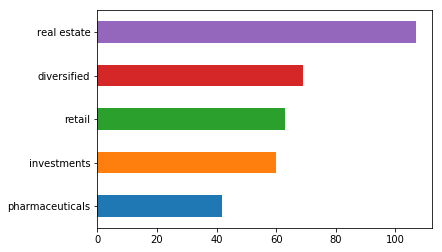

In [69]:
df.sourceofwealth.value_counts().head(5).sort_values().plot(kind='barh')

## 7) How much money do these billionaires have in total?

In [76]:
round(df.networthusbillion.sum())

6454.0

## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [80]:
df.groupby('countrycode').networthusbillion.sum().head(10).sort_values(ascending=False)

countrycode
BRA    192.2
CAN    112.8
AUS     85.4
CHE     80.2
CHL     41.3
AUT     33.8
ARE     14.6
ARG     11.3
BEL      8.0
AGO      3.7
Name: networthusbillion, dtype: float64

In [84]:
df.groupby('countrycode').networthusbillion.sum().sort_values(ascending=False).head(10)

countrycode
USA    2322.4
RUS     422.5
DEU     401.4
CHN     375.8
FRA     235.3
HKG     213.7
BRA     192.2
IND     191.9
ITA     158.1
GBR     152.0
Name: networthusbillion, dtype: float64

## 9) How old is an average billionaire? How old are self-made billionaires  vs. non self-made billionaires? 

In [85]:
#Average billionaire
df.age.median()

63.0

In [87]:
#self-made billionaires
df.groupby('selfmade').age.median()

selfmade
inherited    65.0
self-made    62.0
Name: age, dtype: float64

## 10) Who are the youngest billionaires? Who are the oldest? Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

In [94]:
df.sort_values(by="age", ascending=True).head(10)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4,genders
1172,2014,Perenna Kei,1284,Hong Kong,HKG,1.3,inherited,inherited,female,24.0,...,1996.0,NaN,real estate,inherited from father,NaN,http://en.wikipedia.org/wiki/Perenna_Kei,http://www.loganestate.com/en/about.aspx?ftid=294,NaN,NaN,NaN
397,2014,Dustin Moskovitz,202,United States,USA,6.8,self-made,founder non-finance,male,29.0,...,2004.0,NaN,Facebook,NaN,NaN,http://en.wikipedia.org/wiki/Dustin_Moskovitz,http://www.forbes.com/profile/dustin-moskovitz/,https://www.facebook.com/facebook/info?tab=pag...,NaN,NaN
1004,2014,Mark Zuckerberg,21,United States,USA,28.5,self-made,founder non-finance,male,29.0,...,2004.0,NaN,Facebook,NaN,NaN,http://www.forbes.com/profile/mark-zuckerberg/,NaN,NaN,NaN,NaN
127,2014,"Anton Kathrein, Jr.",1270,Germany,DEU,1.4,inherited,inherited,male,29.0,...,1919.0,NaN,antennas,3rd generation,NaN,http://www.forbes.com/profile/anton-kathrein-jr/#,NaN,NaN,NaN,NaN
394,2014,Drew Houston,1372,United States,USA,1.2,self-made,founder non-finance,male,30.0,...,2007.0,NaN,Dropbox,NaN,NaN,http://en.wikipedia.org/wiki/Drew_Houston,http://en.wikipedia.org/wiki/Dropbox_(service),http://www.forbes.com/profile/drew-houston/,NaN,NaN
28,2014,Albert von Thurn und Taxis,1092,Germany,DEU,1.6,inherited,inherited,male,30.0,...,1615.0,NaN,diversified,"monopoly on postal service in germany, nationa...","two older sisters, did not inherit title becau...",http://en.wikipedia.org/wiki/Thurn_und_Taxis,"http://en.wikipedia.org/wiki/Albert,_12th_Prin...",NaN,NaN,NaN
406,2014,Eduardo Saverin,367,Brazil,BRA,4.1,self-made,founder non-finance,male,31.0,...,2004.0,NaN,Facebook,NaN,NaN,http://en.wikipedia.org/wiki/Eduardo_Saverin,http://www.bloomberg.com/news/articles/2012-05...,NaN,NaN,NaN
1340,2014,Scott Duncan,215,United States,USA,6.3,inherited,inherited,male,31.0,...,1968.0,NaN,pipelines,inherited from father,NaN,http://en.wikipedia.org/wiki/Scott_Duncan_(bus...,http://www.forbes.com/profile/dannine-avara/,NaN,NaN,NaN
1607,2014,Yang Huiyan,196,China,CHN,6.9,inherited,inherited,female,32.0,...,1997.0,NaN,real estate,inherited from father,NaN,http://en.wikipedia.org/wiki/Yang_Huiyan,NaN,NaN,NaN,NaN
991,2014,Marie Besnier Beauvalot,642,France,FRA,2.7,inherited,inherited,female,33.0,...,1933.0,NaN,cheese,inherited from father,oldest brother is CEO,http://www.forbes.com/profile/emmanuel-besnier/,http://en.wikipedia.org/wiki/Lactalis,NaN,NaN,NaN


In [89]:
#oldest
df.sort_values(by="age", ascending=False).head(10)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4,genders
343,2014,"David Rockefeller, Sr.",580,United States,USA,2.9,inherited,inherited,male,98.0,...,1870.0,NaN,"oil, banking",family made most of fortune in the late 19th a...,NaN,http://en.wikipedia.org/wiki/David_Rockefeller,http://en.wikipedia.org/wiki/Standard_Oil,http://en.wikipedia.org/wiki/Rockefeller_family,NaN,NaN
816,2014,Karl Wlaschek,305,Austria,AUT,4.8,self-made,founder non-finance,male,96.0,...,1953.0,NaN,retail,NaN,NaN,http://en.wikipedia.org/wiki/BILLA,http://en.wikipedia.org/wiki/Karl_Wlaschek,https://www.billa.at/Footer_Nav_Seiten/Geschic...,NaN,NaN
836,2014,Kirk Kerkorian,328,United States,USA,4.5,self-made,self-made finance,male,96.0,...,1924.0,NaN,"casinos, investments",purchased in 1969,NaN,http://en.wikipedia.org/wiki/Kirk_Kerkorian,http://www.forbes.com/profile/kirk-kerkorian/,PROFILE: Las Vegas billionaire amassed his wea...,NaN,NaN
588,2014,Henry Hillman,687,United States,USA,2.5,inherited,inherited,male,95.0,...,1942.0,NaN,investments,inherited from father,NaN,http://www.forbes.com/profile/henry-hillman/,http://en.wikipedia.org/wiki/Calgon_Carbon,NaN,NaN,NaN
435,2014,Erika Pohl-Stroher,1154,Germany,DEU,1.5,inherited,inherited,female,95.0,...,1880.0,NaN,hair products,3rd generation,23% stake in the company,http://www.forbes.com/profile/erika-pohl-stroher/,http://en.wikipedia.org/wiki/Wella,NaN,NaN,NaN
1428,2014,Sulaiman Al Rajhi,931,Saudi Arabia,SAU,1.9,self-made,self-made finance,male,94.0,...,1957.0,NaN,banking,NaN,NaN,http://en.wikipedia.org/wiki/Al-Rajhi_Bank,http://www.alrajhibank.com.sa/ar/investor-rela...,http://www.alrajhibank.com.sa/ar/about-us/page...,NaN,NaN
122,2014,Anne Cox Chambers,58,United States,USA,15.5,inherited,inherited,female,94.0,...,1898.0,NaN,media,inherited from brother,NaN,http://en.wikipedia.org/wiki/Anne_Cox_Chambers,http://www.forbes.com/lists/2010/10/billionair...,http://www.nytimes.com/2007/05/30/business/med...,NaN,NaN
815,2014,Karl Albrecht,23,Germany,DEU,25.0,self-made,executive,male,94.0,...,1914.0,NaN,retail,"(split from Aldi Nord in 1966, but both branch...",took over mother's single grocerty store,http://en.wikipedia.org/wiki/Karl_Albrecht,http://www.bloomberg.com/news/articles/2014-07...,http://aldiuscareers.com/about-aldi/history,NaN,NaN
77,2014,Aloysio de Andrade Faria,483,Brazil,BRA,3.3,inherited,inherited,male,93.0,...,1925.0,NaN,banking,inherited from father,NaN,http://en.wikipedia.org/wiki/Aloysio_de_Andrad...,http://en.wikipedia.org/wiki/Banco_da_Lavoura_...,http://www.forbes.com/profile/aloysio-de-andra...,NaN,NaN
1560,2014,Wang Yung-Tsai,520,Taiwan,Taiwan,3.1,self-made,founder non-finance,male,93.0,...,1954.0,NaN,plastics,NaN,NaN,http://www.forbes.com/profile/wang-yung-tsai/,What's good for the goose South China Morning ...,NaN,NaN,NaN


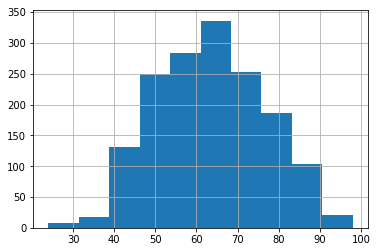

In [96]:
df['age'].hist()

## 11) Make a scatterplot of net worth compared to age

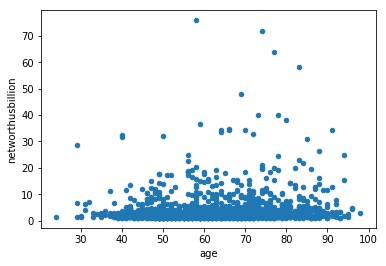

In [99]:
df.plot(x='age', y='networthusbillion', kind='scatter')

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

In [112]:
richest=df.sort_values(by="networthusbillion", ascending=False)
richest.head()

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4,genders
184,2014,Bill Gates,1,United States,USA,76.0,self-made,founder non-finance,male,58.0,...,1975.0,NaN,Microsoft,NaN,NaN,http://www.forbes.com/profile/bill-gates/,NaN,NaN,NaN,NaN
226,2014,Carlos Slim Helu,2,Mexico,MEX,72.0,self-made,privatized and resources,male,74.0,...,1990.0,NaN,telecom,NaN,NaN,http://www.ozy.com/provocateurs/carlos-slims-w...,NaN,NaN,NaN,NaN
79,2014,Amancio Ortega,3,Spain,ESP,64.0,self-made,founder non-finance,male,77.0,...,1975.0,NaN,retail,NaN,NaN,http://www.forbes.com/profile/amancio-ortega/,NaN,NaN,NaN,NaN
1562,2014,Warren Buffett,4,United States,USA,58.2,self-made,founder non-finance,male,83.0,...,1839.0,NaN,Berkshire Hathaway,NaN,NaN,http://www.forbes.com/lists/2009/10/billionair...,http://www.forbes.com/companies/berkshire-hath...,NaN,NaN,NaN
862,2014,Larry Ellison,5,United States,USA,48.0,self-made,founder non-finance,male,69.0,...,1977.0,NaN,Oracle,NaN,NaN,http://www.forbes.com/profile/larry-ellison/,http://www.businessinsider.com/how-larry-ellis...,NaN,NaN,NaN


In [114]:
#NOT WORKING
df.plot(y=(richest['networthusbillion'].head(10)), x=(richest['name'].head(10)), kind='barh')

KeyError: "['Bill Gates' 'Carlos Slim Helu' 'Amancio Ortega' 'Warren Buffett'\n 'Larry Ellison' 'David Koch' 'Charles Koch' 'Sheldon Adelson'\n 'Christy Walton' 'Jim Walton'] not in index"

In [ ]:
df.plot(y='length', x='animal', kind='barh')